In [1]:
# imprting the required packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score,KFold

%matplotlib inline

In [2]:
# reading the data from csv file using pandas
df = pd.read_csv("../datasets/Data_SVM.csv",header=None)
df.tail()

,0,1,2
195,-0.218959,-0.962146,1
196,0.139168,0.250831,1
197,-0.995021,-0.143295,1
198,-0.301618,-0.224473,1
199,-0.611556,-0.612601,1


In [3]:
# dataframe to matrix 
D = df.as_matrix()

# creating the data X and labels y from given table 
X = D[1:,:-1] # data
y = D[1:,-1] #labels
print(X.shape,y.shape)

((199, 2), (199,))


In [4]:
# finding the classes 
c1 = np.where(y==1)
c2 = np.where(y==-1)

In [5]:
# separating the two classes
Xc1 = X[c1]
Xc2 = X[c2]

## 1.Plot the data

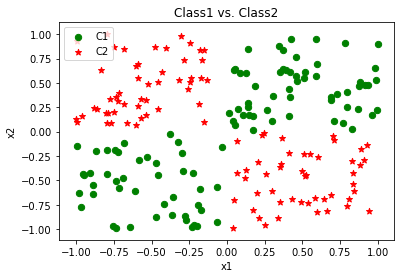

In [6]:
# plotting the data
plt.figure(1)
plt.scatter(Xc1[:,0],Xc1[:,1],s=40,c = 'g' ,marker='o', alpha=1, label='C1')
plt.scatter(Xc2[:,0],Xc2[:,1],s=40,c = 'r', marker='*', alpha=1, label='C2')
plt.title("Class1 vs. Class2")
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("tight")
plt.legend(loc='upper left')
plt.savefig("plots/P2_SVMData_C1C2")

## General test: using linear, rbf, poly...

In [7]:

C = 10.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=100, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=6, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

In [8]:
print (rbf_svc )

print(poly_svc)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=6, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


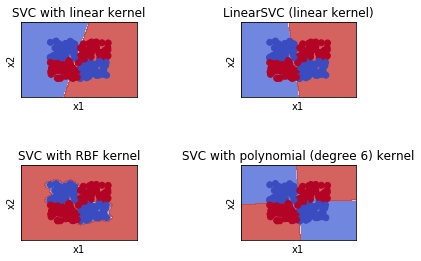

In [9]:
# create a mesh to plot in
h = .02 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 6) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.9, hspace=0.9)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.savefig("../Submission/Documentation/images/P2/comparison.png")

## 2.Polynomial Kernel to classify the data

In [26]:

best_score = 0
k_scores = []
for degree in  [0,1, 2]:
    for C in [0.01,0.01, 0.1, 1, 10,100]:        
        for i in range(1,10):               
            kfold = KFold(n_splits=10)
            svm = SVC(kernel='poly',degree=degree, C=C)
            scores = cross_val_score(svm, X, y, cv=kfold)
        k_scores.append(scores.mean())
        k_std.append(scores.std())
#         print("c= {},d={}, scores={}".format(C,degree,max(k_scores)))
        if max(k_scores)>best_score:
            best_score = max(k_scores)
            best_parameters = {'C': C, 'degree': degree}
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))
print("Best score : {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("std: {}".format(max(k_std)))

('Length of list', 18)
('Max of list', 0.97499999999999998)
Best score : 0.97
('Best parameters: ', {'C': 100, 'degree': 2})
std: 0.140690078047


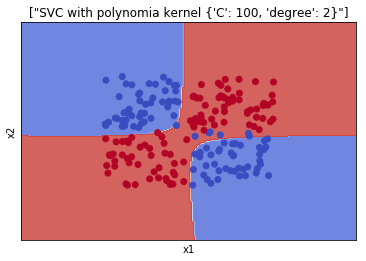

In [23]:
svm = SVC(degree=1,C=0.1)
svm.fit(X, y)
# create a mesh to plot in
h = .02 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# title for the plots
titles = ["SVC with polynomia kernel {'C': 100, 'degree': 2}"]


Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title(titles)
plt.savefig("../Submission/Documentation/images/P2/polyd2c100.png")

## 3.RBF Kernel to classify the data

In [18]:
best_score = 0
k_scores = []
k_std = []
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:        
        for i in range(1,10):               
            kfold = KFold(n_splits=10)
            svm = SVC(kernel='rbf',gamma=gamma, C=C)
            scores = cross_val_score(svm, X, y, cv=kfold)
        k_scores.append(scores.mean())
        k_std.append(scores.std())
#         print("c= {},g={}, scores={}".format(C,gamma,max(k_scores)))
        if max(k_scores)>best_score:
            best_score = max(k_scores)
            best_parameters = {'C': C, 'gamma': gamma}
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))
print("Best score : {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print(max(k_std))

('Length of list', 36)
('Max of list', 0.98000000000000009)
Best score : 0.98
('Best parameters: ', {'C': 100, 'gamma': 1})
0.139106019872


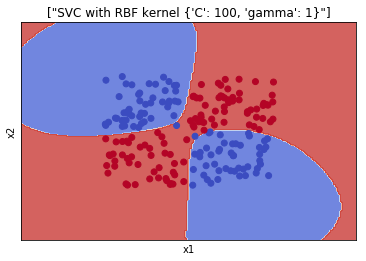

In [19]:
svm = SVC(**best_parameters)
svm.fit(X, y)
# create a mesh to plot in
h = .02 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# title for the plots
titles = ["SVC with RBF kernel {'C': 100, 'gamma': 1}"]


Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title(titles)
plt.savefig("../Submission/Documentation/images/P2/RBFg1c100.png")

## Finding best parameters with train, test, validation data

In [19]:

# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(
X, y, random_state=0)
# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)
print("Size of training set: {} size of validation set: {} size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:

        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))


Size of training set: 111 size of validation set: 38 size of test set: 50

Best score on validation set: 0.97
('Best parameters: ', {'C': 10, 'gamma': 100})
Test set score with best parameters: 0.96


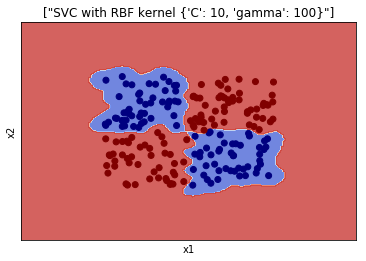

In [20]:
svm = SVC(**best_parameters)
svm.fit(X, y)
# create a mesh to plot in
h = .02 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# title for the plots
titles = ["SVC with RBF kernel {'C': 10, 'gamma': 100}"]


Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.jet)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title(titles)
plt.savefig("../Submission/Documentation/images/P2/RBFg100c10.png")

## Variations in classification with respect to parameters C, gamma

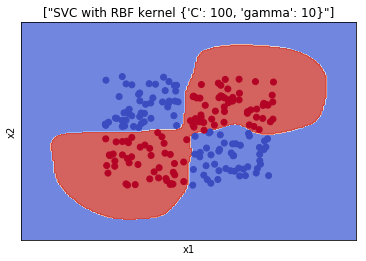

In [15]:
svm = SVC(gamma=10,C=100)
svm.fit(X, y)
# create a mesh to plot in
h = .02 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# title for the plots
titles = ["SVC with RBF kernel {'C': 100, 'gamma': 10}"]


Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title(titles)
plt.title(titles)
plt.savefig("../Submission/Documentation/images/P2/RBFg10c100.png")

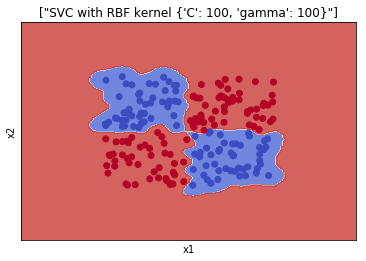

In [14]:
svm = SVC(gamma=100,C=100)
svm.fit(X, y)
# create a mesh to plot in
h = .02 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# title for the plots
titles = ["SVC with RBF kernel {'C': 100, 'gamma': 100}"]


Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title(titles)
plt.savefig("../Submission/Documentation/images/P2/RBFg100c100.png")

## Polynomial Kernel and variations in degree,C

In [23]:

# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(
X, y, random_state=0)
# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)
print("Size of training set: {} size of validation set: {} size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for degree in [1,2,3,4,5,6]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:

        # for each combination of parameters, train an SVC
        svm = SVC(kernel='poly',degree=degree, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'degree': degree}
# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))


Size of training set: 111 size of validation set: 38 size of test set: 50

Best score on validation set: 0.97
('Best parameters: ', {'C': 100, 'degree': 2})
Test set score with best parameters: 0.98


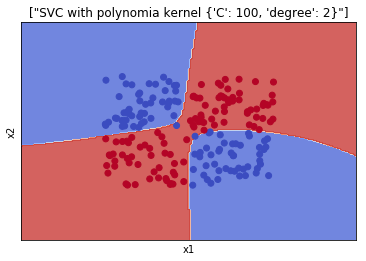

In [24]:
svm = SVC(degree=2,C=100)
svm.fit(X, y)
# create a mesh to plot in
h = .02 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# title for the plots
titles = ["SVC with polynomia kernel {'C': 100, 'degree': 2}"]


Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title(titles)
plt.savefig("../Submission/Documentation/images/P2/polyd2c100.png")